In [18]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Given data
mu = 0.85  # Village average proportion
p_hat = 0.88  # Claimed proportion
n = 100  # Assumed sample size (standard assumption)
alpha = 0.05  # Significance level

print("=== Mango Quality Hypothesis Test ===")
print(f"Village average (μ): {mu*100}%")
print(f"Claimed proportion (p̂): {p_hat*100}%")
print(f"Sample size (n): {n}")
print()

# Standard Error
se = np.sqrt(mu * (1 - mu) / n)
print(f"Standard Error (SE): {se:.4f}")
print()

# Z-score calculation
z_score = (p_hat - mu) / se
print(f"Z-score: {z_score:.4f}")
print()

# P-value (one-tailed right)
p_value = 1 - stats.norm.cdf(z_score)
print(f"One-tailed p-value: {p_value:.4f}")
print()

# Critical value
z_critical = stats.norm.ppf(1 - alpha)
print(f"Critical Z (α={alpha}, one-tailed): {z_critical:.4f}")
print()

# Decision
print("=== DECISION ===")
if z_score > z_critical:
    print("✅ REJECT H₀: Claim is significantly higher than average!")
else:
    print("❌ FAIL TO REJECT H₀: Claim is NOT significantly different from 85%")
print()

print("Hypotheses:")
print("- H₀: p = 0.85 (garden same as village average)")
print("- H₁: p > 0.85 (garden better than average)")
print(f'Decision basis: Z={z_score:.2f} {'<' if z_score < z_critical else '>'} {z_critical:.2f} & p={p_value:.3f} {'>' if p_value > alpha else '<'=} α={alpha}')

=== Mango Quality Hypothesis Test ===
Village average (μ): 85.0%
Claimed proportion (p̂): 88.0%
Sample size (n): 100

Standard Error (SE): 0.0357

Z-score: 0.8402

One-tailed p-value: 0.2004

Critical Z (α=0.05, one-tailed): 1.6449

=== DECISION ===
❌ FAIL TO REJECT H₀: Claim is NOT significantly different from 85%

Hypotheses:
- H₀: p = 0.85 (garden same as village average)
- H₁: p > 0.85 (garden better than average)
Decision basis: Z=0.84 < 1.64 & p=0.200 '>' if p_value > alpha else '<'='>' α=0.05


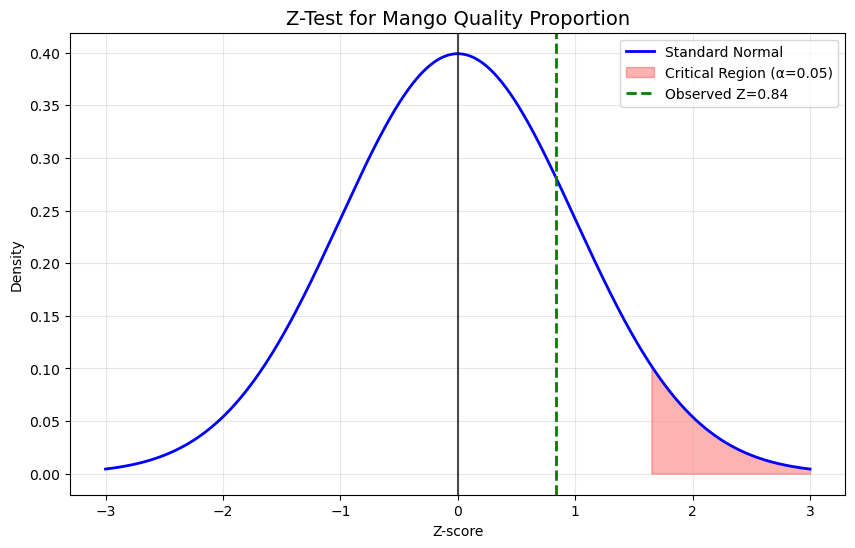

In [19]:
# Plot Z-distribution with critical region
x = np.linspace(-3, 3, 1000)
y = stats.norm.pdf(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2, label='Standard Normal')
plt.fill_between(x, y, where=(x >= z_critical), color='red', alpha=0.3, label=f'Critical Region (α={alpha})')
plt.axvline(z_score, color='green', linestyle='--', linewidth=2, label=f'Observed Z={z_score:.2f}')
plt.axvline(0, color='black', linestyle='-', alpha=0.7)
plt.title('Z-Test for Mango Quality Proportion', fontsize=14)
plt.xlabel('Z-score')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()